In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

####CLASSIFYING THE DATA AND REMOVING DUPLICATE TILESCAN ROWS


# pddf=pd.read_csv('/Users/secchim/Documents/VWF_043_MS211118_onstage_plt_depletion_metadata.csv')
# pddf1=pd.read_csv('/Users/secchim/Documents/VWF_045_MS211208_2h_24h_pltdepletion_IVM_metadata.csv')
# pddf2=pd.read_csv('/Users/secchim/Documents/VWF_048_MS220117_IVM_depletion_metadata.csv')
# pddf3=pd.read_csv('/Users/secchim/Documents/VWF_049_MS220201_IVM_depletion_metadata.csv')
# pddf4=pd.read_csv('/Users/secchim/Documents/VWF_053_MS220208_IVMdepletion_metadata.csv')
# pddf5=pd.read_csv('/Users/secchim/Documents/VWF_060_MS220406_IVMpltdepletion24h_metadata.csv')
# pddf6=pd.read_csv('/Users/secchim/Documents/VWF_062_MS220418_IVMdepletion24h_metadata.csv')
# pddf7=pd.read_csv('/Users/secchim/Documents/VWF_063_MS220428_IVMdepletion24h_metadata.csv')
# pddf8=pd.read_csv('/Users/secchim/Documents/VWF_066_MS220519_IVMdepletion24h_metadata.csv')
# pddf9=pd.read_csv('/Users/secchim/Documents/VWF_067_MS220526_IVMdepletion24h_metadata.csv')


# pddf=pd.concat([pddf, pddf1, pddf2, pddf3, pddf4, pddf5, pddf6, pddf7, pddf8, pddf9 ], axis =0)

# pddf=pd.read_csv('/Users/secchim/Documents/221102_VWF_043_045_048_049_053_060_062_063_066_067_IVM_metadata.csv')
pddf=pd.read_csv('/Users/secchim/Documents/VWF_078_MS230210_metadata.csv')
pddf

##### WORKS
pddf.loc[pddf['NZslices']==1, 'Datatype']='snap'
pddf.loc[pddf['NZslices']>1, 'Datatype']='single_zstack'
pddf.loc[pddf['Tilerow']>1, 'Datatype']='tilescan'
pddf.loc[pddf['Tilecolumn'] >1, 'Datatype']='tilescan'
pddf.loc[pddf['Nframes']>1, 'Datatype']='movie'

pddf

#REMOVING THE TILESCAN PROCESSED FILES

#df=pddf[pddf['Position_Name'].str.contains('padd')==False]
#df=df[df['Position_Name'].str.contains('stich')==False]

#ALSO NEED TO MANUALLY CHANGE VWF_045 files which lack the MS in the name
#df['Position_Name']=df['Position_Name'].str.replace(r'VWF_045_211','VWF_045_MS211')
pddf['Position_Name']=pddf['Position_Name'].str.replace(r'VWF_067_2205','VWF_067_MS2205')

# pddf.to_csv('/Users/secchim/Documents/221102Combined_metadata_edited.csv', index=False)
#1368 rows
#changed the date format manually to short and reversed !!!!! 2022-03-04

pddf.to_csv('/Users/secchim/Documents/230210_VWF_078_metadata_edited.csv', index=False)
pddf

,Position_Name,Cell_name,Position_X,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,N_X,N_Y,Original_Filename,Scale_X,Scale_Y,Scale_Z,Datatype
0,VWF_078_MS230119_M1_tilescan_Day0.czi_TR1,TR1,1926.810,43703.350,2023-01-19,10:53:20.7861624Z,4,1,31,4,7,3278,1894,VWF_078_MS230119_M1_tilescan_Day0.czi,8.286426e-07,8.286426e-07,0.000003,tilescan
1,VWF_078_MS230119_M3_tilescan_Day0.czi_TR1,TR1,1933.846,44151.827,2023-01-19,12:44:49.4103127Z,4,1,49,4,6,2818,1895,VWF_078_MS230119_M3_tilescan_Day0.czi,8.286426e-07,8.286426e-07,0.000003,tilescan
2,VWF_078_MS230119_M2_tilescan_Day0.czi_TR1,TR1,2463.176,43972.248,2023-01-19,14:51:13.9220218Z,4,1,39,4,6,2818,1895,VWF_078_MS230119_M2_tilescan_Day0.czi,8.286426e-07,8.286426e-07,0.000003,tilescan
3,VWF_078_MS230119_M4_tilescan_Day0.czi_TR1,TR1,225.433,45243.897,2023-01-19,16:29:28.786703Z,4,1,67,4,6,2818,1894,VWF_078_MS230119_M4_tilescan_Day0.czi,8.286426e-07,8.286426e-07,0.000003,tilescan
4,VWF_078_MS230120_M1_tilescan_Day1.czi_TR1,TR1,2751.271,43473.337,2023-01-20,09:36:45.4986237Z,4,1,35,4,7,3278,1895,VWF_078_MS230120_M1_tilescan_Day1.czi,8.286426e-07,8.286426e-07,0.000003,tilescan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,VWF_078_MS230120_M3_tilescan_Day1-Stitching-02...,TR1,2680.640,43812.036,2023-01-20,11:33:41.287475Z,4,1,49,4,6,2818,1862,VWF_078_MS230120_M3_tilescan_Day1-Stitching-02...,8.286426e-07,8.286426e-07,0.000003,tilescan
141,VWF_078_MS230122_M5_tilescan_Day0-Stitching-02...,TR1,3097.130,43544.415,2023-01-22,08:35:54.7027833Z,4,1,60,4,6,2777,1921,VWF_078_MS230122_M5_tilescan_Day0-Stitching-02...,8.286426e-07,8.286426e-07,0.000003,tilescan
142,VWF_078_MS230123_M5_tilescan_Day1-Stitching-05...,TR1,3223.151,43581.755,2023-01-23,09:35:39.0813011Z,4,1,60,4,6,2824,1904,VWF_078_MS230123_M5_tilescan_Day1-Stitching-05...,8.286426e-07,8.286426e-07,0.000003,tilescan
143,VWF_078_MS230122_M6_tilescan_Day0-Stitching-03...,TR1,3330.795,44577.237,2023-01-22,10:17:33.4693497Z,4,1,42,4,6,2821,1901,VWF_078_MS230122_M6_tilescan_Day0-Stitching-03...,8.286426e-07,8.286426e-07,0.000003,tilescan


<AxesSubplot:ylabel='Frequency'>

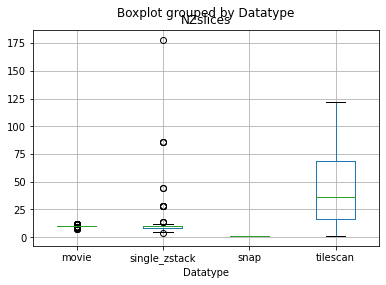

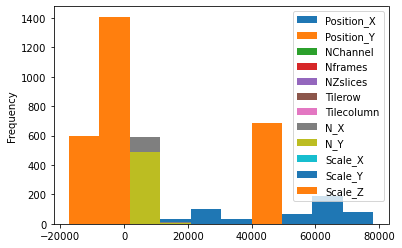

In [11]:
pddf.boxplot(column= 'NZslices', by= 'Datatype')
pddf.plot.hist(by='NZslices')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


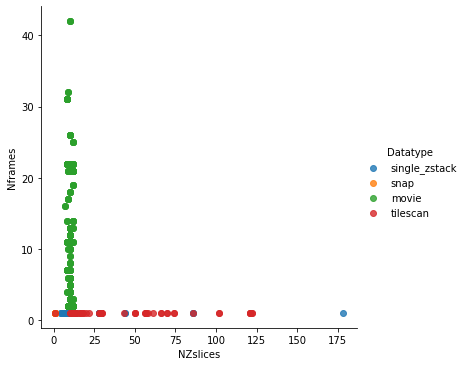

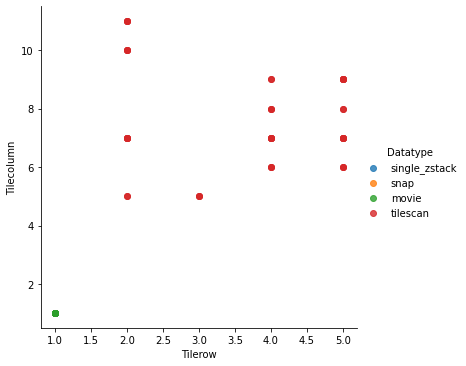

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

sns.lmplot('NZslices','Nframes',data=pddf, hue='Datatype', fit_reg=False)

sns.lmplot('Tilerow','Tilecolumn',data=pddf, hue='Datatype', fit_reg=False)

In [9]:
#date_cols=["Imaging_Date", ''] #, parse_dates=date_cols

#need to change the date format here too!!!
# mice=pd.read_csv('/Volumes/LUIS1_MS/Experiments/IVM_mice_info.csv')
mice=pd.read_csv('/Volumes/mas515/home/Experiments/IVM_mice_info.csv')
mice
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'-','')
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'2022','22')
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'2021','21')
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'2023','23')
mice['FileID']= (mice['Experiment']+'_MS'+mice['Imaging_Date']+'_'+mice['Experiment mouse number'])
#PB STRING WON T BE EXACTLY THAT IN FILENAME


# mice.to_csv('/Users/secchim/Documents/mice_fileID.csv', index=False)

mice



,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Imaging_Date,Strain,Comments,Platelet_count_sysmex x10^3,dilution 1 in,platelet_count,Time of bleeding,Number of DP,relative_time_of_bleeding,FileID
0,M1,113778-LL,Vwf Tg/+ Hoxb5Tg/+,31/10/2021,11w,F,plt_depletion,14:05:00,homeostasis+ after depletion,VWF_048,...,220119,Hoxb5_Vwf,NaN,19,5,95,15:15:00,2,01:10:00,VWF_048_MS220119_M1
1,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,homeostasis,na,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,na,na,na,na,1,na,VWF_048_MS220118_M2
2,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,12:12:00,homeostasis+ after depletion,VWF_048,...,220120,Hoxb5_ILVL,NaN,2,5,10,16:30:00,NaN,04:18:00,VWF_048_MS220120_M2
3,M3,113819-RL,Vwf Tg/+ Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,homeostasis,na,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,na,na,na,na,1,na,VWF_048_MS220118_M3
4,M3,113819-RL,Vwf Tg/+ Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,17:30:00,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,13,5,65,19:30:00,1,02:00:00,VWF_048_MS220118_M3
5,M2,109281-RRL,Vwf Tg/+ Hoxb5Tg/+,08/10/2021,8.8w,F,plt_depletion,09:17:00,3h,VWF_045,...,211208,Hoxb5_Vwf,NaN,2,5,10,17:25:00,0,08:08:00,VWF_045_MS211208_M2
6,M1,109278-RRL,Vwf Tg/+ Hoxb5Tg/+,08/10/2021,8.8w,M,plt_depletion,09:00:00,24h,VWF_045,...,211209,Hoxb5_Vwf,died at 10:30_headpiece detached after,0,5,0,11:15:00,NaN,02:15:00,VWF_045_MS211209_M1
7,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,211118,Hoxb5_ILVL,NaN,36,1,36,17:30:00,NaN,04:11:00,VWF_043_MS211118_M1
8,M2,104769-RL,Vwf Tg/+ Hoxb5Tg/+,06/09/2021,10.3,M,homeostasis,na,NaN,VWF_043,...,211119,Hoxb5_Vwf,"injected before anaesthesia, headpiece detached",na,na,na,na,0,na,VWF_043_MS211119_M2
9,M3,109464-RL,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,04/10/2021,7.3,M,homeostasis,na,NaN,VWF_043,...,211125,Hoxb5_ILVL,NaN,na,na,na,na,0,na,VWF_043_MS211125_M3


In [12]:
#changed the date format manually to short and reversed !!!!! 2022-03-04

# df=pd.read_csv('/Users/secchim/Documents/221102Combined_metadata_edited.csv')
df=pd.read_csv('/Users/secchim/Documents/230210_VWF_078_metadata_edited.csv')

#x=(df['Position_Name'][0:16])
#df['FileID']=x
df['FileID']=df['Position_Name'].str.upper()
df['FileID']=df['FileID'].str[0:19]
print(df['FileID'])

# merged_df=df.merge(mice, how='left', left_on='FileID', right_on=['FileID'] )
merged_df=pd.merge(mice, df[:], on = 'FileID')

#merged_df.to_csv('/Users/secchim/Documents/220920merged_metadata_and_mice.csv', index=False)
merged_df.to_csv('/Users/secchim/Documents/230210_VWF_078_metadata_merged.csv')#version including old

merged_df

#1501 row which does not make sense

0      VWF_078_MS230119_M1
1      VWF_078_MS230119_M3
2      VWF_078_MS230119_M2
3      VWF_078_MS230119_M4
4      VWF_078_MS230120_M1
              ...         
140    VWF_078_MS230120_M3
141    VWF_078_MS230122_M5
142    VWF_078_MS230123_M5
143    VWF_078_MS230122_M6
144    VWF_078_MS230126_M6
Name: FileID, Length: 145, dtype: object


,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,NZslices,Tilerow,Tilecolumn,N_X,N_Y,Original_Filename,Scale_X,Scale_Y,Scale_Z,Datatype
0,M1,169176-R,Vwf Tg/+ Hoxb5Tg/+,11/11/2022,9.6,M,old_homeostasis,na,NaN,VWF_078,...,31,4,7,3278,1894,VWF_078_MS230119_M1_tilescan_Day0.czi,8.290000e-07,8.290000e-07,0.000003,tilescan
1,M1,169176-R,Vwf Tg/+ Hoxb5Tg/+,11/11/2022,9.6,M,old_homeostasis,na,NaN,VWF_078,...,31,4,7,3284,1905,VWF_078_MS230119_M1_tilescan_Day0-Stitching-01...,8.290000e-07,8.290000e-07,0.000003,tilescan
2,M1,169176-R,Vwf Tg/+ Hoxb5Tg/+,11/11/2022,9.6,M,old_homeostasis,na,NaN,VWF_078,...,31,4,7,3284,1905,VWF_078_MS230119_M1_tilescan_Day0-Stitching-01...,8.290000e-07,8.290000e-07,0.000003,tilescan
3,M1,169176-R,Vwf Tg/+ Hoxb5Tg/+,11/11/2022,9.6,M,old_homeostasis,na,NaN,VWF_078,...,35,4,7,3278,1895,VWF_078_MS230120_M1_tilescan_Day1.czi,8.290000e-07,8.290000e-07,0.000003,tilescan
4,M1,169176-R,Vwf Tg/+ Hoxb5Tg/+,11/11/2022,9.6,M,old_homeostasis,na,NaN,VWF_078,...,23,1,1,512,512,VWF_078_MS230120_M1_zstack_Day1.czi,8.290000e-07,8.290000e-07,0.000003,single_zstack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M6,121084-RL,Vwf Tg/+ Hoxb5Tg/+,20/12/21,59,F,old_homeostasis,na,NaN,VWF_078,...,12,1,1,2072,3034,VWF_078_MS230123_M6_movie.czi,4.870000e-07,4.870000e-07,0.000003,movie
99,M6,121084-RL,Vwf Tg/+ Hoxb5Tg/+,20/12/21,59,F,old_homeostasis,na,NaN,VWF_078,...,12,1,1,2072,3034,VWF_078_MS230123_M6_movie.czi,4.870000e-07,4.870000e-07,0.000003,movie
100,M6,121084-RL,Vwf Tg/+ Hoxb5Tg/+,20/12/21,59,F,old_homeostasis,na,NaN,VWF_078,...,12,1,1,2072,3034,VWF_078_MS230123_M6_movie.czi,4.870000e-07,4.870000e-07,0.000003,movie
101,M6,121084-RL,Vwf Tg/+ Hoxb5Tg/+,20/12/21,59,F,old_homeostasis,na,NaN,VWF_078,...,12,1,1,2072,3034,VWF_078_MS230123_M6_movie.czi,4.870000e-07,4.870000e-07,0.000003,movie


In [15]:
#Adding columns with acquisition time only and correcting treatment category based on time of treatment and acquisition time

#merged_df['FileID']

merged_df['AcquisitionTime']=merged_df['AcquisitionTime'].str[:8]
#merged_df['AcquisitionTime']

merged_df=merged_df.drop_duplicates()

grouped=merged_df.groupby(['Position_Name'])
grouped #list of dataframes

dflist=[]

for i, newdf in grouped: #new df is grouped data franes
   # print(i,df)
    if newdf.shape[0]>1:
        # print(newdf.shape)
        # print(i)
        # print(newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'])
        # if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
        trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
        #if trmttime > newdf['AcquisitionTime']:

        newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
    else: 
        newdf['TrueTreatment']="none"
    dflist.append(newdf)
xdf=pd.concat(dflist)

# grouped.obj
xdf
# #trmttime
# # outdf

xdf=xdf[
    ((xdf['Treatment']=='homeostasis') & (xdf['TrueTreatment']=='Thomeostasis'))|
    ((xdf['Treatment']=='plt_depletion') & (xdf['TrueTreatment']=='Tdepletion'))|
    (xdf['TrueTreatment']=='none')
    ]
print(len(xdf))

##stopped working
# xdf[~((xdf['Treatment'].str.contains("plt_depletion")) & (xdf['TrueTreatment'].str.contains("Thomeostasis")))]
# xdf[~((xdf['Treatment'].str.contains("homeostasis")) & (xdf['TrueTreatment'].str.contains("Tdepletion")))]


#Now creating a TrueTreatment column with the correct treatment category
grouped=xdf.groupby(['Position_Name'])
grouped #list of dataframes

dflist=[]

for i, newdf in grouped: #new df is grouped data franes
   # print(i,df)
    if newdf.shape[0]>1:
        print(newdf.shape)

        #if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
        trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
        #if trmttime > newdf['AcquisitionTime']:
        newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
    else: 
        newdf['TrueTreatment']="none"
    dflist.append(newdf)
xdf=pd.concat(dflist)


xdf.drop_duplicates()
xdf['BatchID']=xdf['Experiment']+'_'+xdf['Experiment mouse number']
#EXPORT
# xdf.to_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv', index=False)
# xdf=pd.read_csv('/Users/secchim/Documents/230210_VWF_078_metadata_merged.csv')

xdf

# # x=merged_ddf['Position_Name'].to_list()
# # #print(x)

# # for name in x: 
# #     y=merged_ddf[merged_ddf['Position_Name']==name]
# #     if (y.shape[0])>1:
# #         print(name)



# #     else:
# #         print('1')



1071


,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Tilecolumn,N_X,N_Y,Original_Filename,Scale_X,Scale_Y,Scale_Z,Datatype,TrueTreatment,BatchID
387,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,1,512,512,VWF_043_MS211118_m1-01.czi,8.290000e-07,8.290000e-07,1.000000,snap,none,VWF_043_M1
428,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,1,5541,2104,VWF_043_MS211118_m1-01.czi,4.870000e-07,4.870000e-07,0.000003,single_zstack,none,VWF_043_M1
427,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,1,5541,2104,VWF_043_MS211118_m1-01.czi,4.870000e-07,4.870000e-07,0.000003,single_zstack,none,VWF_043_M1
426,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,1,5541,2104,VWF_043_MS211118_m1-01.czi,4.870000e-07,4.870000e-07,0.000003,single_zstack,none,VWF_043_M1
425,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,1,5541,2104,VWF_043_MS211118_m1-01.czi,4.870000e-07,4.870000e-07,0.000003,single_zstack,none,VWF_043_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,1,1168,1168,VWF_067_220527_M1_snap5.czi,3.630000e-07,3.630000e-07,1.000000,snap,none,VWF_067_M1
1518,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,1,1168,1168,VWF_067_220527_M1_snap6.czi,2.140000e-07,2.140000e-07,1.000000,snap,none,VWF_067_M1
1520,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,1,1168,1168,VWF_067_220527_M1_snap7.czi,3.630000e-07,3.630000e-07,1.000000,snap,none,VWF_067_M1
1521,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,1,1168,1168,VWF_067_220527_M1_snap8.czi,3.630000e-07,3.630000e-07,1.000000,snap,none,VWF_067_M1


In [8]:
print(len(xdf))
xdf[~((xdf['Treatment'].str.contains("plt")) & (xdf['TrueTreatment'].str.contains("Tho")))]
xdf[~((xdf['Treatment'].str.contains("hom")) & (xdf['TrueTreatment'].str.contains("Tdep")))]

print(len(xdf))

xdf=xdf[
    ((xdf['Treatment']=='homeostasis') & (xdf['TrueTreatment']=='Thomeostasis'))|
    ((xdf['Treatment']=='plt_depletion') & (xdf['TrueTreatment']=='Tdepletion'))|
    (xdf['TrueTreatment']=='none')
    ]
print(len(xdf))

1321
1321
1071


In [ ]:
# print(len(mice),len(df), len(merged_df))

# # merged_df[['Position_Name','Imaging_Date']]#for slicing multiple column need 2 sets of square brackets
# merged_df.drop_duplicates().shape


# ####RANDOMLY TAKING 5 FILES TO CHECK

# ddf=df.sample(n=5, axis=0)
# ddf
# merged_ddf=pd.merge(mice, ddf[:], on = 'FileID')
# merged_ddf

In [220]:
# unique=[]
# # for i in df['FileID']:
# #     if not mice['FileID'].str.contains(i).all:
# #         unique.append(i)


# for i in mice['FileID']:
#     if df['FileID'] not in mice['FileID']:
#         unique.append(i)
# set(unique)

##TESTING THE MERGED METHOD TO SEE IF ANY FILES ARE LOST 

# merged_df=pd.merge(mice, df[:], how='right', on = 'FileID') #1662 rows with that merged method #1502 rows with other method 
# merged_df
# merged_df[(~merged_df['FileID'].str.contains('VWF'))]#29 

,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Position_X,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype
0,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,-15158.400,42631.4,2021-11-18,10:21:41.8776175Z,4,1,1,1,1,snap
1,M2,104769-RL,Vwf Tg/+ Hoxb5Tg/+,06/09/2021,10.3,M,homeostasis,na,NaN,VWF_043,...,1089.900,42771.1,2021-11-19,11:05:20.8283997Z,4,1,1,1,1,snap
2,M2,104769-RL,Vwf Tg/+ Hoxb5Tg/+,06/09/2021,10.3,M,homeostasis,na,NaN,VWF_043,...,2529.700,45018.3,2021-11-19,11:07:39.3291817Z,4,1,1,1,1,snap
3,M2,104769-RL,Vwf Tg/+ Hoxb5Tg/+,06/09/2021,10.3,M,homeostasis,na,NaN,VWF_043,...,1907.600,44908.5,2021-11-19,11:09:29.289019Z,4,1,1,1,1,snap
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66665.200,45378.1,2021-11-26,13:46:13.3553207Z,4,1,5,1,1,single_zstack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,514.599,44557.4,2022-05-27,09:45:04.6787894Z,4,1,1,1,1,snap
1658,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,-139.500,44223.0,2022-05-27,09:49:46.3923098Z,4,1,1,1,1,snap
1659,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,1149.000,43387.9,2022-05-27,08:08:37.6802669Z,2,1,1,1,1,snap
1660,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,-696.800,43781.0,2022-05-27,08:04:36.6685496Z,2,1,1,1,1,snap


In [158]:
grouped=merged_ddf.groupby(['Position_Name'])
grouped #list of dataframes

dflist=[]

for i, newdf in grouped: #new df is grouped data franes
   # print(i,df)
    if newdf.shape[0]>1:
        print(newdf.shape)

        #if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
        trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
        #if trmttime > newdf['AcquisitionTime']:
        newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
    else: 
        newdf['TrueTreatment']="none"
    dflist.append(newdf)
xdf=pd.concat(dflist)

#grouped.obj

#trmttime
# outdf

# xdf=xdf[
#     ((xdf['Treatment']=='homeostasis') & (xdf['TrueTreatment']=='Thomeostasis'))|
#     ((xdf['Treatment']=='plt_depletion') & (xdf['TrueTreatment']=='Tdepletion'))|
#     (xdf['TrueTreatment']==np.nan)
#     ]



xdf

        

(2, 32)


,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype,TrueTreatment
0,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,12:12:00,homeostasis+ after depletion,VWF_048,...,45792.1,2022-01-20,10:06:48,3,1,1,1,1,snap,none
1,M1,115916-R,Vwf Tg/+ Hoxb5Tg/+,19/11/2021,10.4w,F,homeostasis,na,homeostasis+ after depletion,VWF_049,...,-6506.3,2022-02-01,13:10:23,3,1,10,1,1,single_zstack,Thomeostasis
2,M1,115916-R,Vwf Tg/+ Hoxb5Tg/+,19/11/2021,10.4w,F,plt_depletion,14:55:00,homeostasis+ after depletion,VWF_049,...,-6506.3,2022-02-01,13:10:23,3,1,10,1,1,single_zstack,Thomeostasis
3,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43579.2,2022-04-20,10:49:51,4,1,1,1,1,snap,none
4,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,44453.7,2022-05-27,11:09:48,4,1,8,1,1,single_zstack,none
5,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,44557.4,2022-05-27,09:45:04,4,1,1,1,1,snap,none


In [160]:
xdf[~((xdf['Treatment'].str.contains("plt_depletion")) & (xdf['TrueTreatment'].str.contains("Thomeostasis")))]
xdf[~((xdf['Treatment'].str.contains("homeostasis")) & (xdf['TrueTreatment'].str.contains("Tdepletion")))]

,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype,TrueTreatment
0,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,12:12:00,homeostasis+ after depletion,VWF_048,...,45792.1,2022-01-20,10:06:48,3,1,1,1,1,snap,none
1,M1,115916-R,Vwf Tg/+ Hoxb5Tg/+,19/11/2021,10.4w,F,homeostasis,na,homeostasis+ after depletion,VWF_049,...,-6506.3,2022-02-01,13:10:23,3,1,10,1,1,single_zstack,Thomeostasis
3,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43579.2,2022-04-20,10:49:51,4,1,1,1,1,snap,none
4,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,44453.7,2022-05-27,11:09:48,4,1,8,1,1,single_zstack,none
5,M1,134779-R,Vwf Tg/Tg Hoxb5Tg/+,25/03/2022,8.6,M,24h_depletion,09:00:00,NaN,VWF_067,...,44557.4,2022-05-27,09:45:04,4,1,1,1,1,snap,none


In [153]:
xdf['TrueTreatment']

0             NaN
1    Thomeostasis
2    Thomeostasis
3             NaN
4             NaN
5             NaN
Name: TrueTreatment, dtype: object

In [77]:
x=df['Position_Name'].to_list()
#print(x)

for name in x: 
    y=df[df['Position_Name']==name]
    if (y.shape[0])>1:
        print(name)
    else:
        print('1')





# y=df[df['Position_Name']=='VWF_043_MS211118_m1-P1.czi']
# print(y.shape[0])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
VWF_043_MS211118_m1-02.czi
1
1
1
1
1
1
1
1
1
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P11
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P12
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P11
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P12
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature.czi_P5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
VWF_048_MS220118_M3_P2.czi
VWF_048_MS220118_M3_P26.czi
VWF_048_MS220118_M3_P6.czi
1
VWF_048_MS220118_M3_P5.czi
VWF_048_MS220118_M3_P8.czi
VWF_048_MS220118_M3_P10.czi
1
VWF_048

In [37]:
merged_df['BatchID']=merged_df['Experiment']+'_'+merged_df['Experiment mouse number']
merged_df.to_csv('/Users/secchim/Documents/merged_metadata_and_mice.csv', index=False)
merged_df

,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype,BatchID
0,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43579.2,20/04/2022,10:49:51.9221983Z,4,1,1,1,1,snap,VWF_062_M1
1,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43510.9,20/04/2022,12:07:45.5392363Z,4,1,1,1,1,snap,VWF_062_M1
2,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,44395.8,20/04/2022,11:45:08.1857928Z,4,1,1,1,1,snap,VWF_062_M1
3,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,44399.7,20/04/2022,12:02:44.5401837Z,4,1,1,1,1,snap,VWF_062_M1
4,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43532.3,20/04/2022,11:14:58.6078059Z,4,1,1,1,1,snap,VWF_062_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,45470.3,21/04/2022,09:37:43.7935426Z,4,1,1,1,1,snap,VWF_062_M5
98,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,45406.5,21/04/2022,10:10:45.7352893Z,4,1,1,1,1,snap,VWF_062_M5
99,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,44994.8,21/04/2022,10:13:54.7361472Z,4,1,1,1,1,snap,VWF_062_M5
100,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,44916.4,21/04/2022,10:20:04.0638908Z,4,1,1,1,1,snap,VWF_062_M5
